In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# The Simulaltion is performed for a Draft deal and data is obtained from the FM Converge Draft of the option
# The trade deal is USDJPY with the following setup
#Strike_price = 108.1035
#Spot_price = 108.1035
Strike_price = 100
Spot_price = 100
Volatility = 6.4/100
r_d = 0.12297945/100
r_f = 1.95487502/100
T_expiry = 90
Premium = 10 # Assumed Value 
# Spread Strike definition 
lower_strike = 0.8 * Strike_price
upper_strike = 1.2 * Strike_price
range_spot = (np.arange(200)/100)*Strike_price;

In [3]:
def call_option(strike):
    # Call option 
    Call_option = np.minimum(range_spot,strike)
    payoff_call_option = range_spot - Call_option
    return payoff_call_option
def put_option(strike):
    # put option 
    put_option = np.maximum(range_spot,strike)
    payoff_put_option = put_option - range_spot 
    return payoff_put_option
def plot_option(option,premium,title=None):
    plt.figure()
    plt.plot(range_spot,option-premium)
    zero_line = np.zeros(200)
    plt.plot(Strike_price, option[100]-premium,'r*')
    plt.plot(range_spot,zero_line,'r-')
    plt.title(title)

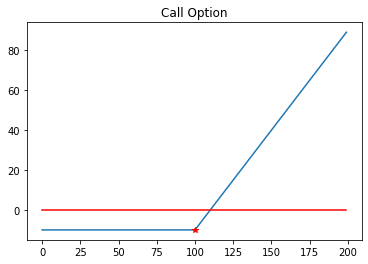

In [4]:
plot_option(call_option(Strike_price),Premium,"Call Option")

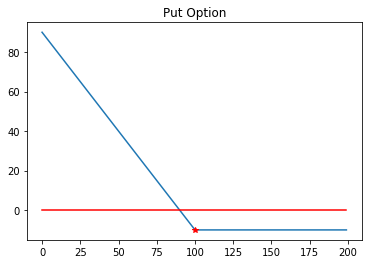

In [5]:
plot_option(put_option(Strike_price),Premium,"Put Option")

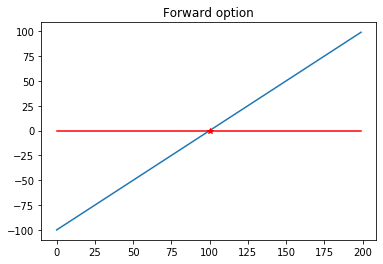

In [6]:
# Forward Option
forward_option = call_option(Strike_price)-put_option(Strike_price)
plot_option(forward_option,0,"Forward option")

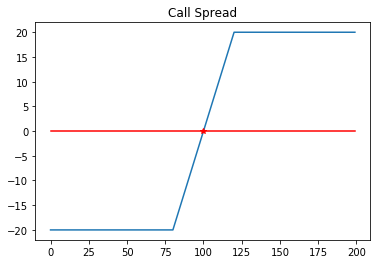

In [7]:
call_spread = np.add(call_option(lower_strike),-call_option(upper_strike))
plot_option(call_spread,2*Premium,"Call Spread")

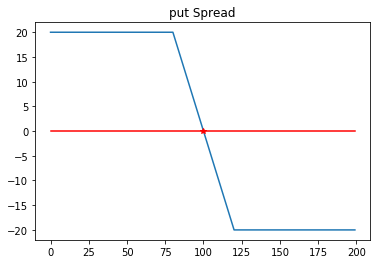

In [8]:
put_spread = np.add(-put_option(lower_strike),put_option(upper_strike))
plot_option(put_spread,2*Premium,"put Spread")

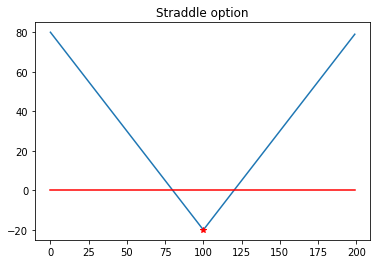

In [12]:
# Long call + put option leading to a straddle
strangle_option = call_option(Strike_price)+put_option(Strike_price)
plot_option(strangle_option,2*Premium,"Straddle option")

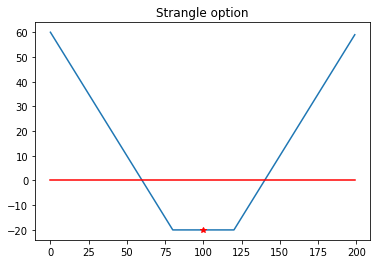

In [17]:
# Long call + put option leading to a strangle when strike prices are different
strangle_option = call_option(upper_strike)+put_option(lower_strike)
plot_option(strangle_option,2*Premium,"Strangle option")

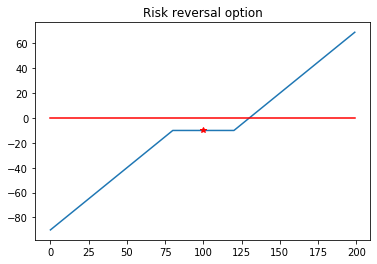

In [10]:
# Risk Reversal 
risk_reversal_option = -put_option(lower_strike)+call_option(upper_strike)
plot_option(risk_reversal_option,Premium,"Risk reversal option")

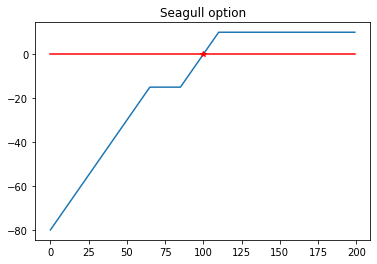

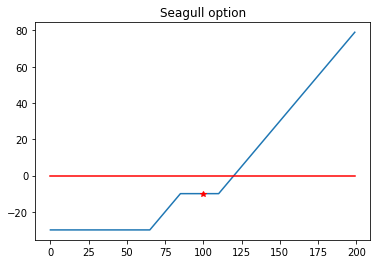

In [11]:
# Seagull using 2 calls and 1 put option 
seagull_option = -call_option(0.65*Strike_price)+call_option(0.85*Strike_price)-put_option(1.1*Strike_price)
plot_option(seagull_option,-3*Premium,"Seagull option")
# Seagull using 2 puts and 1 call option
seagull_option = put_option(0.65*Strike_price)-put_option(0.85*Strike_price)+call_option(1.1*Strike_price)
plot_option(seagull_option,Premium,"Seagull option")
